# Analysis of Web Traffic Data

## Exploring and Visualizing Page Views on a Forum Over Time

This notebook focuses on analyzing and visualizing web traffic data for a forum. The goal is to understand the trends, seasonality, and any outliers in the page views from May 2016 to December 2019. The analysis includes cleaning the data, identifying outliers, and creating various plots to visualize the data's trends and patterns.

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

In [39]:
import warnings
warnings.filterwarnings('ignore')


In [40]:
df = pd.read_csv("../csv/fcc-forum-pageviews.csv", parse_dates=True) 
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


# Data Exploration of FCC Forum Pageviews

In this section, we will perform a thorough exploration of the `fcc-forum-pageviews.csv` dataset. We will start by examining the first few rows of the dataset to understand its structure and the type of data it contains. This will be followed by checking for missing values and understanding the data types of each column. We will also perform descriptive statistics to get an overview of the dataset's distribution and potential outliers.

In [41]:
# Display the first few rows of the dataset
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


# Checking for Missing Values and Data Types

Next, we will check for any missing values in the dataset. Handling missing data is a crucial step in data preprocessing. We will also look at the data types of each column to ensure they are appropriate for the data they represent. This step is important for identifying potential issues with data type mismatches.

In [42]:
# Check for missing values and data types
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


date     0
value    0
dtype: int64

## Initial Data Exploration

In this section, we will perform an initial exploration of the `fcc-forum-pageviews.csv` dataset. This includes viewing the first few rows of the dataset, checking its structure, and understanding the types of data it contains. This step is crucial for getting a basic understanding of the dataset's format and contents.

In [43]:
# Display the first few rows of the dataset
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


## Data Structure and Types

Next, we will examine the structure of the dataset. This includes checking the number of rows and columns, the data types of each column, and looking for any missing values. This step helps in identifying any data cleaning and preprocessing needs.

In [44]:
# Check the shape of the dataset
df.shape

# Check data types of each column and look for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


## Statistical Summary

We will now generate a statistical summary of the dataset. This includes measures like mean, median, standard deviation, etc., for each numerical column. This step is important for understanding the distribution and central tendencies of the data.

In [45]:
# Generate a statistical summary of the dataset
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()


,value
count,1304.00
mean,67220.68
std,59339.64
min,1201.00
25%,35757.75
50%,57197.50
75%,83883.00
max,1173655.00


## Identifying and Removing Outliers from the DataFrame `df`

In the following code cell, we will implement a method to identify and remove outliers from the dataframe `df`. Outliers can significantly skew the results of data analysis and statistical modeling. We will use the Interquartile Range (IQR) method for this purpose, which is a common statistical technique used to find outliers.

In [46]:
def remove_outliers(df):
    # Select only numeric columns for outlier removal
    numeric_df = df.select_dtypes(include=[np.number])

    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1

    # Applying the outlier filter to the numeric columns
    filter_condition = ~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)

    # Return the filtered DataFrame
    return df[filter_condition]

# Applying the function to remove outliers from df
filtered_df = remove_outliers(df)

# Displaying the first few rows of the filtered dataframe
filtered_df.head()


,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


## Plotting a Line Graph from the Filtered DataFrame

In this section, we will plot a line graph using the filtered dataframe `filtered_df`. The graph will display the relationship between two variables represented by `x_axis_data` and `y_axis_data`. This visualization will help in understanding the trends and patterns in the data.

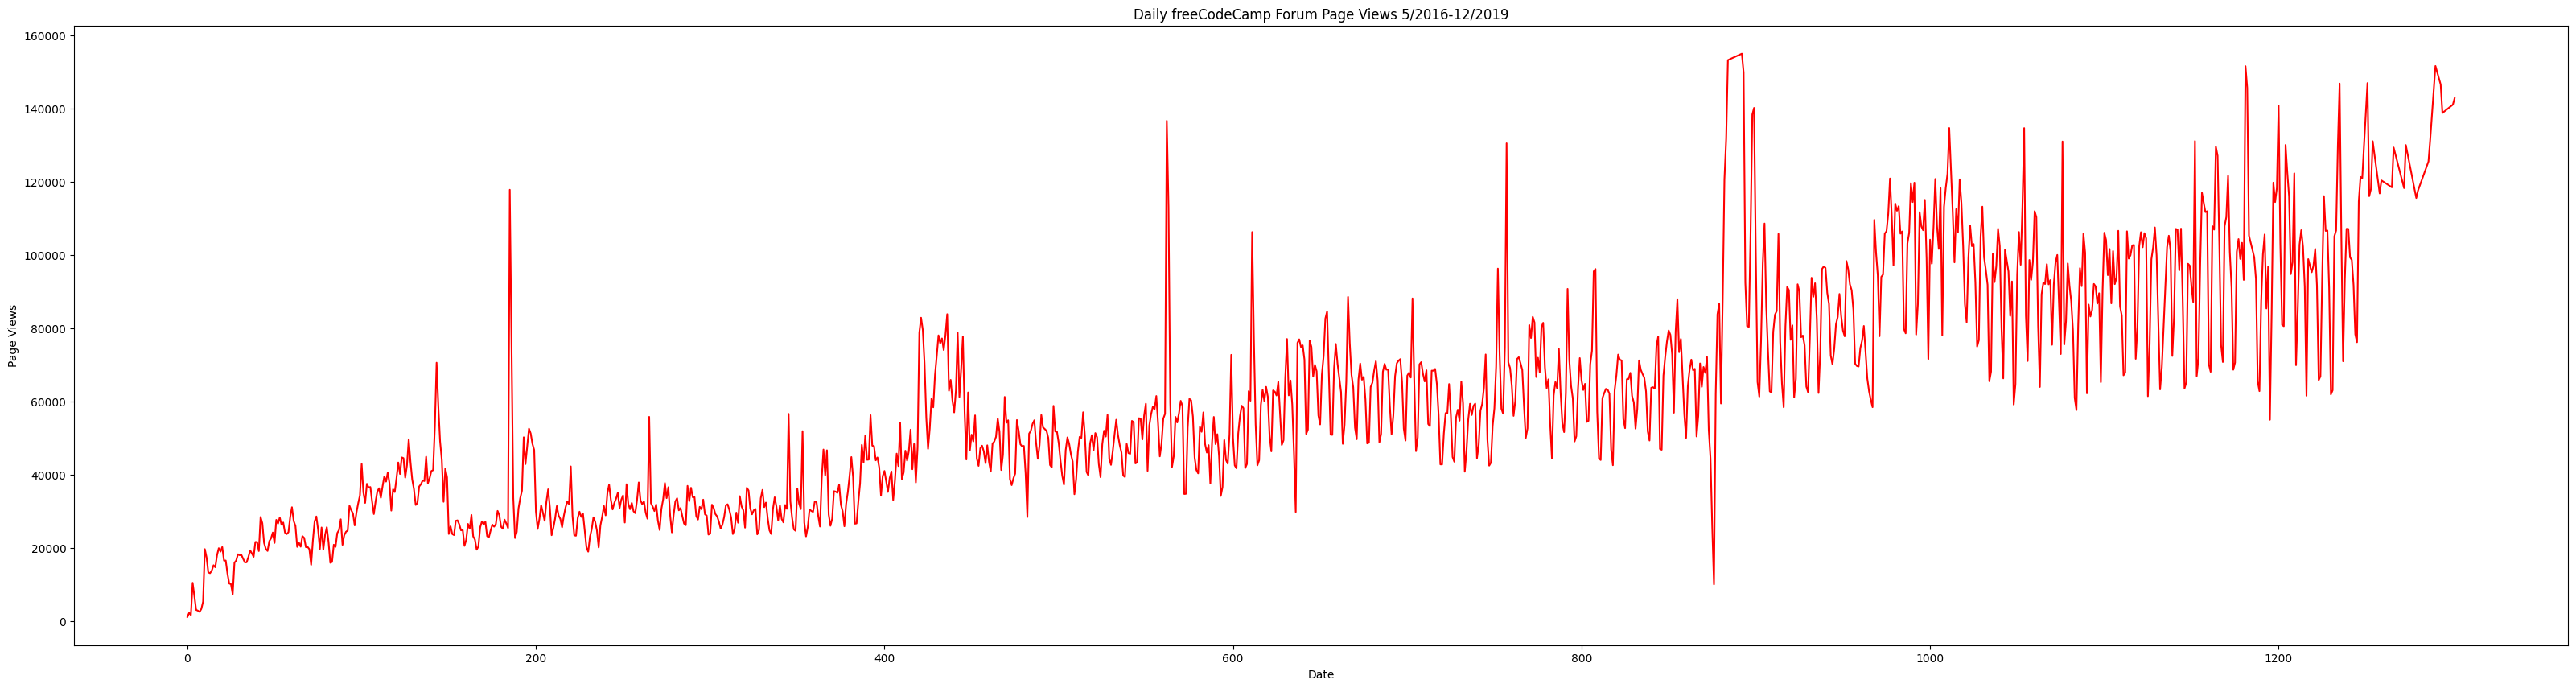

In [47]:
# Importing matplotlib for plotting
import matplotlib.pyplot as plt

# Function to draw a line plot
def draw_line_plot(x_axis_data, y_axis_data):
    fig, ax = plt.subplots(figsize=(40,10))
    ax.plot(x_axis_data, y_axis_data, "r")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

# Drawing the line plot using the filtered dataframe
draw_line_plot(filtered_df.index, filtered_df["value"])

## Creating Year and Month Columns and Pivoting the DataFrame

In this step, we will create two new columns in the `filtered_df` dataframe from the index, which contains dates. These new columns will represent the year and the month for each row. After that, we will pivot the dataframe to group and average the values by year and month.

In [48]:
# Resetting the index to its original state
filtered_df.reset_index(inplace=True)

# Assuming the original index is in a column named 'date', converting it to datetime
filtered_df['date'] = pd.to_datetime(filtered_df['date'], format='%Y-%m-%d')

# Setting the 'date' column as the new index
filtered_df.set_index('date', inplace=True)

# Creating 'year' and 'month' columns from the index
filtered_df['year'] = filtered_df.index.year
filtered_df['month'] = filtered_df.index.month

# Pivoting the dataframe
years = filtered_df.groupby(by=["year","month"])["value"].mean().unstack()

# Displaying the pivoted dataframe
years

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,11242.70,19124.37,23314.23,31049.19,41476.87,27398.32,36354.24,27832.42
2017,32785.16,31113.07,29369.10,30878.73,34244.29,43577.50,65806.84,47712.45,47376.80,47438.71,57701.57,48420.58
2018,58580.10,65679.00,62693.77,62350.83,56562.87,70117.00,63591.06,62831.61,65941.73,94814.83,78688.33,80047.48
2019,102056.52,105968.36,91214.48,89368.43,91439.90,90435.64,97236.57,102717.31,94615.62,113163.39,131752.40,142918.00


In [49]:
filtered_df

,index,value,year,month
date,,,,
2016-05-09,0,1201,2016,5
2016-05-10,1,2329,2016,5
2016-05-11,2,1716,2016,5
2016-05-12,3,10539,2016,5
2016-05-13,4,6933,2016,5
...,...,...,...,...
2019-11-20,1290,151733,2019,11
2019-11-23,1293,146658,2019,11
2019-11-24,1294,138875,2019,11


## Plotting a Clustered Bar Chart

In this section, we will plot a clustered bar chart using the pivoted dataframe `years`. This chart will display the average page views for each month across different years, providing a clear visual comparison of monthly trends over the years.

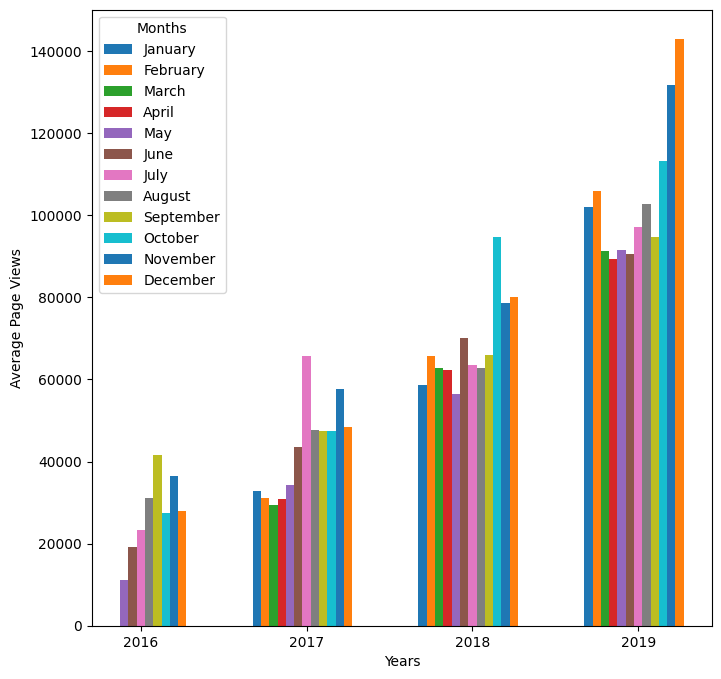

In [50]:
# Setting up the x-axis
x_axis = np.arange(len(years.index))
bar_width = 0.05

# Month names
month_names = ["January","February","March","April","May","June","July","August","September","October","November","December"]


# Plotting the clustered bar chart
fig, ax = plt.subplots(figsize=(8,8))
for i, (month, values) in enumerate(years.items()):
    ax.bar(x_axis + i * bar_width, values, bar_width, label=month_names[i])

# Setting the legend and labels
ax.legend(title="Months", loc="upper left")
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")
ax.set_xticks(x_axis + ((bar_width * len(years.columns)) / 2))
ax.set_xticklabels(years.index)

# Displaying the plot
plt.show()

## Plotting Year-wise and Month-wise Boxplots

Next, we will create two boxplots to analyze the distribution of page views. The first boxplot will be year-wise to observe the trend over the years, and the second will be month-wise to analyze the seasonality in the data. These visualizations will provide insights into the variability and central tendency of the data across different time frames.

In [51]:
# Creating a column 'month_name_abb' with abbreviated month names in 'filtered_df'
month_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
filtered_df['month_name_abb'] = filtered_df['month'].map(month_dict)

In [52]:
# Displaying the first few rows to verify the new column
filtered_df.head()

,index,value,year,month,month_name_abb
date,,,,,
2016-05-09,0,1201,2016,5,May
2016-05-10,1,2329,2016,5,May
2016-05-11,2,1716,2016,5,May
2016-05-12,3,10539,2016,5,May
2016-05-13,4,6933,2016,5,May


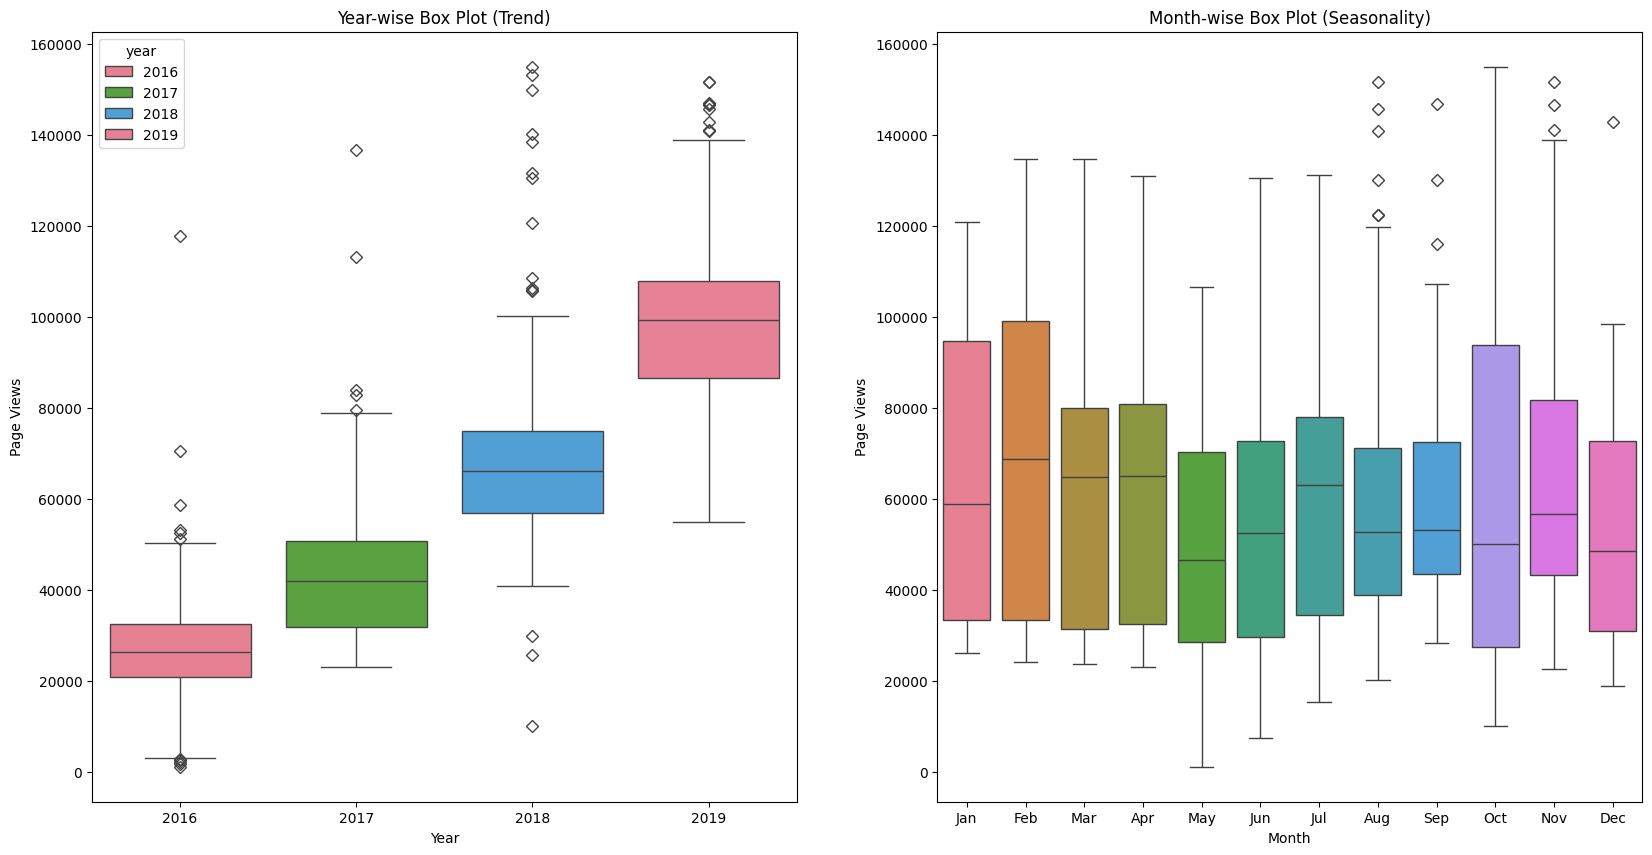

In [53]:
# Importing seaborn for advanced plotting
import seaborn as sns

# Creating boxplots
fig, axes = plt.subplots(ncols=2, figsize=(20,10))

# Year-wise Box Plot
sns.boxplot(x=filtered_df["year"], y=filtered_df["value"], ax=axes[0], hue=filtered_df["year"], flierprops={"marker":"D"}, palette="husl")
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

# Month-wise Box Plot
sns.boxplot(x=filtered_df["month_name_abb"], y=filtered_df["value"], ax=axes[1], flierprops={"marker":"D"}, palette="husl", order=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")

plt.show()